In [1]:
from math import sin, cos, log, ceil, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Model parameters:

g = 9.81
v_e = 325.0         #Exhaust speed in m/s
m_s = 50.0          #Mass of rocket shell in kg
r = 0.50            #Radius of rocket
rho = 1.091         #Average density of air throughout the flight in kg/m^3
C_D = 0.15          #Coefficient of drag
mdotp_0 = 20.0      #Initial burn rate in kg/s
A = pi*(r**2)       #Area of the cross section in m^2

#Initial conditions
h0 = 0.0
v0 = 0.0
m_p0 = 100.0        #Initial rocket propellant weight in kg at t = 0

In [3]:
def f(u):
    v = u[1]
    h = u[0]
    
    return numpy.array([v, -g + (mdotp_values*v_e)/(m_s+m_p[n]) - (0.5*rho*v*abs(v)*A*C_D)/(m_s+mdotp_values)])

In [4]:
def euler_step(u, f, dt):
    
    return u + dt * f(u)

In [5]:
T = 40.0                                                         #Final time
dt = 0.1                                                         #Time step
N = int(T/dt) + 1                                                #Number of time-steps
t = numpy.linspace(0.0,T,N)                                      #Time-discretization

m_p = numpy.empty_like(t, dtype=numpy.ndarray)
mdotp = numpy.zeros_like(t, dtype=numpy.ndarray)
mdotp[0:(5/dt)] = 20.0                                             #Setting the first 5 seconds to 20 kg/s
mdotp_integral = 100.0*numpy.ones_like(t, dtype=numpy.ndarray)
mdotp_integral[0:(5/dt)] = 20.0*t[0:(5/dt)]                        #constant burn rate for the first 5 seconds

#Initialize the array that contains the solutions for each time-step
u = numpy.empty((N,2))
u[0] = numpy.array([h0,v0])

#Euler method - time loop
for n in range(N-1):
    mdotp_values = mdotp[n]
    m_p[n] = m_p0 - mdotp_integral[n]
    u[n+1] = euler_step(u[n], f, dt)


/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
#Get position and velocity with respect to time
v = u[:,1]
h = u[:,0]

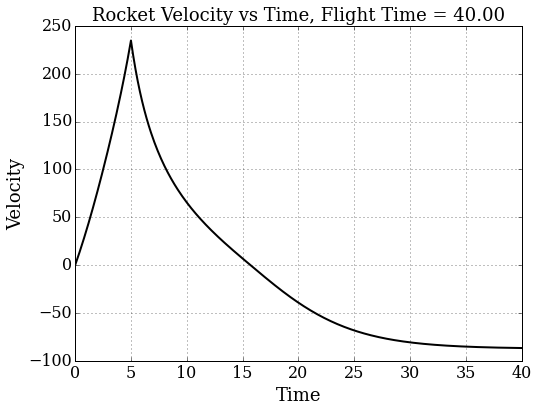

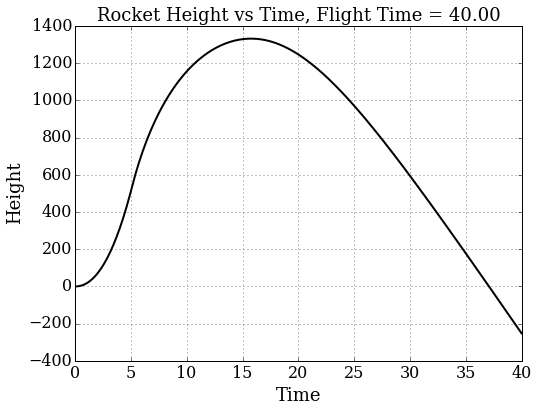

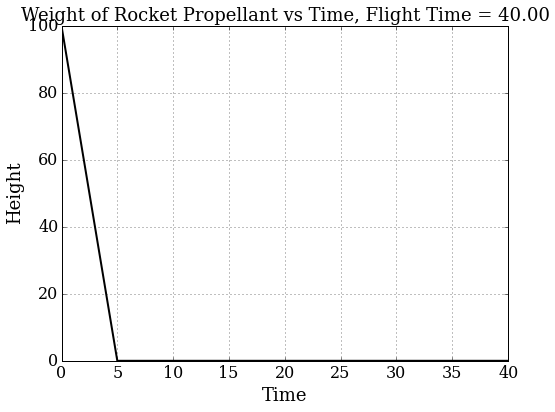

In [7]:
# Visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'Time', fontsize=18)
pyplot.ylabel(r'Velocity', fontsize=18)
pyplot.title('Rocket Velocity vs Time, Flight Time = %.2f' % T, fontsize=18)
pyplot.plot(t,v,'k-',lw=2)

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'Time', fontsize=18)
pyplot.ylabel(r'Height', fontsize=18)
pyplot.title('Rocket Height vs Time, Flight Time = %.2f' % T, fontsize=18)
pyplot.plot(t,h,'k-',lw=2)

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'Time', fontsize=18)
pyplot.ylabel(r'Height', fontsize=18)
pyplot.title('Weight of Rocket Propellant vs Time, Flight Time = %.2f' % T, fontsize=18)
pyplot.plot(t,m_p,'k-',lw=2)